In [15]:
!pip install --upgrade openai


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\surya\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
pip show openai

Name: openai
Version: 1.54.1
Summary: The official Python library for the openai API
Home-page: 
Author: 
Author-email: OpenAI <support@openai.com>
License: 
Location: C:\Users\surya\AppData\Local\Programs\Python\Python312\Lib\site-packages
Requires: anyio, distro, httpx, jiter, pydantic, sniffio, tqdm, typing-extensions
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [66]:
pip install -q python-dotenv

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\surya\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [4]:
import os
import openai
from dotenv import load_dotenv, find_dotenv

load_dotenv(find_dotenv(), override=True)
openai.api_key = os.getenv('OPEN_API_KEY')


In [5]:
from openai import OpenAI
client = OpenAI()
all_jokes = set()
response = client.chat.completions.create(
    model = 'gpt-4o',
    messages = [
        {'role': 'system', 'content': 'You avoid dad jokes.'},
        {'role': 'user', 'content': 'Write a yoda joke'}
    ],
    n=2
)
for c in response.choices:
    print(c.message.content)


Why did Yoda go to the garden?

Because he wanted to grow, he did.
Why was Yoda such a good gardener?

Because he had a green thumb he did!


In [6]:
import base64
def encode_image(image_path):
    with open(image_path, 'rb') as image_file:
        image_binary_data = image_file.read()
        return base64.b64encode(image_binary_data).decode('utf-8')



In [9]:
def get_image_description(image_path):
    base64_image = encode_image(image_path)
    prompt = 'describe the image in 1 sentence in hindi'
    
    response = client.chat.completions.create(
        model = 'gpt-4o',
        messages = [
            {'role': 'system', 'content': 'You are a helpful image reader'},
            {'role': 'user', 'content': [
                {'type': 'text', 'text': prompt},
                {'type': 'image_url', 'image_url': {
                    'url': f'data:image/jpg;base64,{base64_image}'}
                }
            ]
            }
        ],
        temperature = 0
    )
    for c in response.choices:
        print(c.message.content)

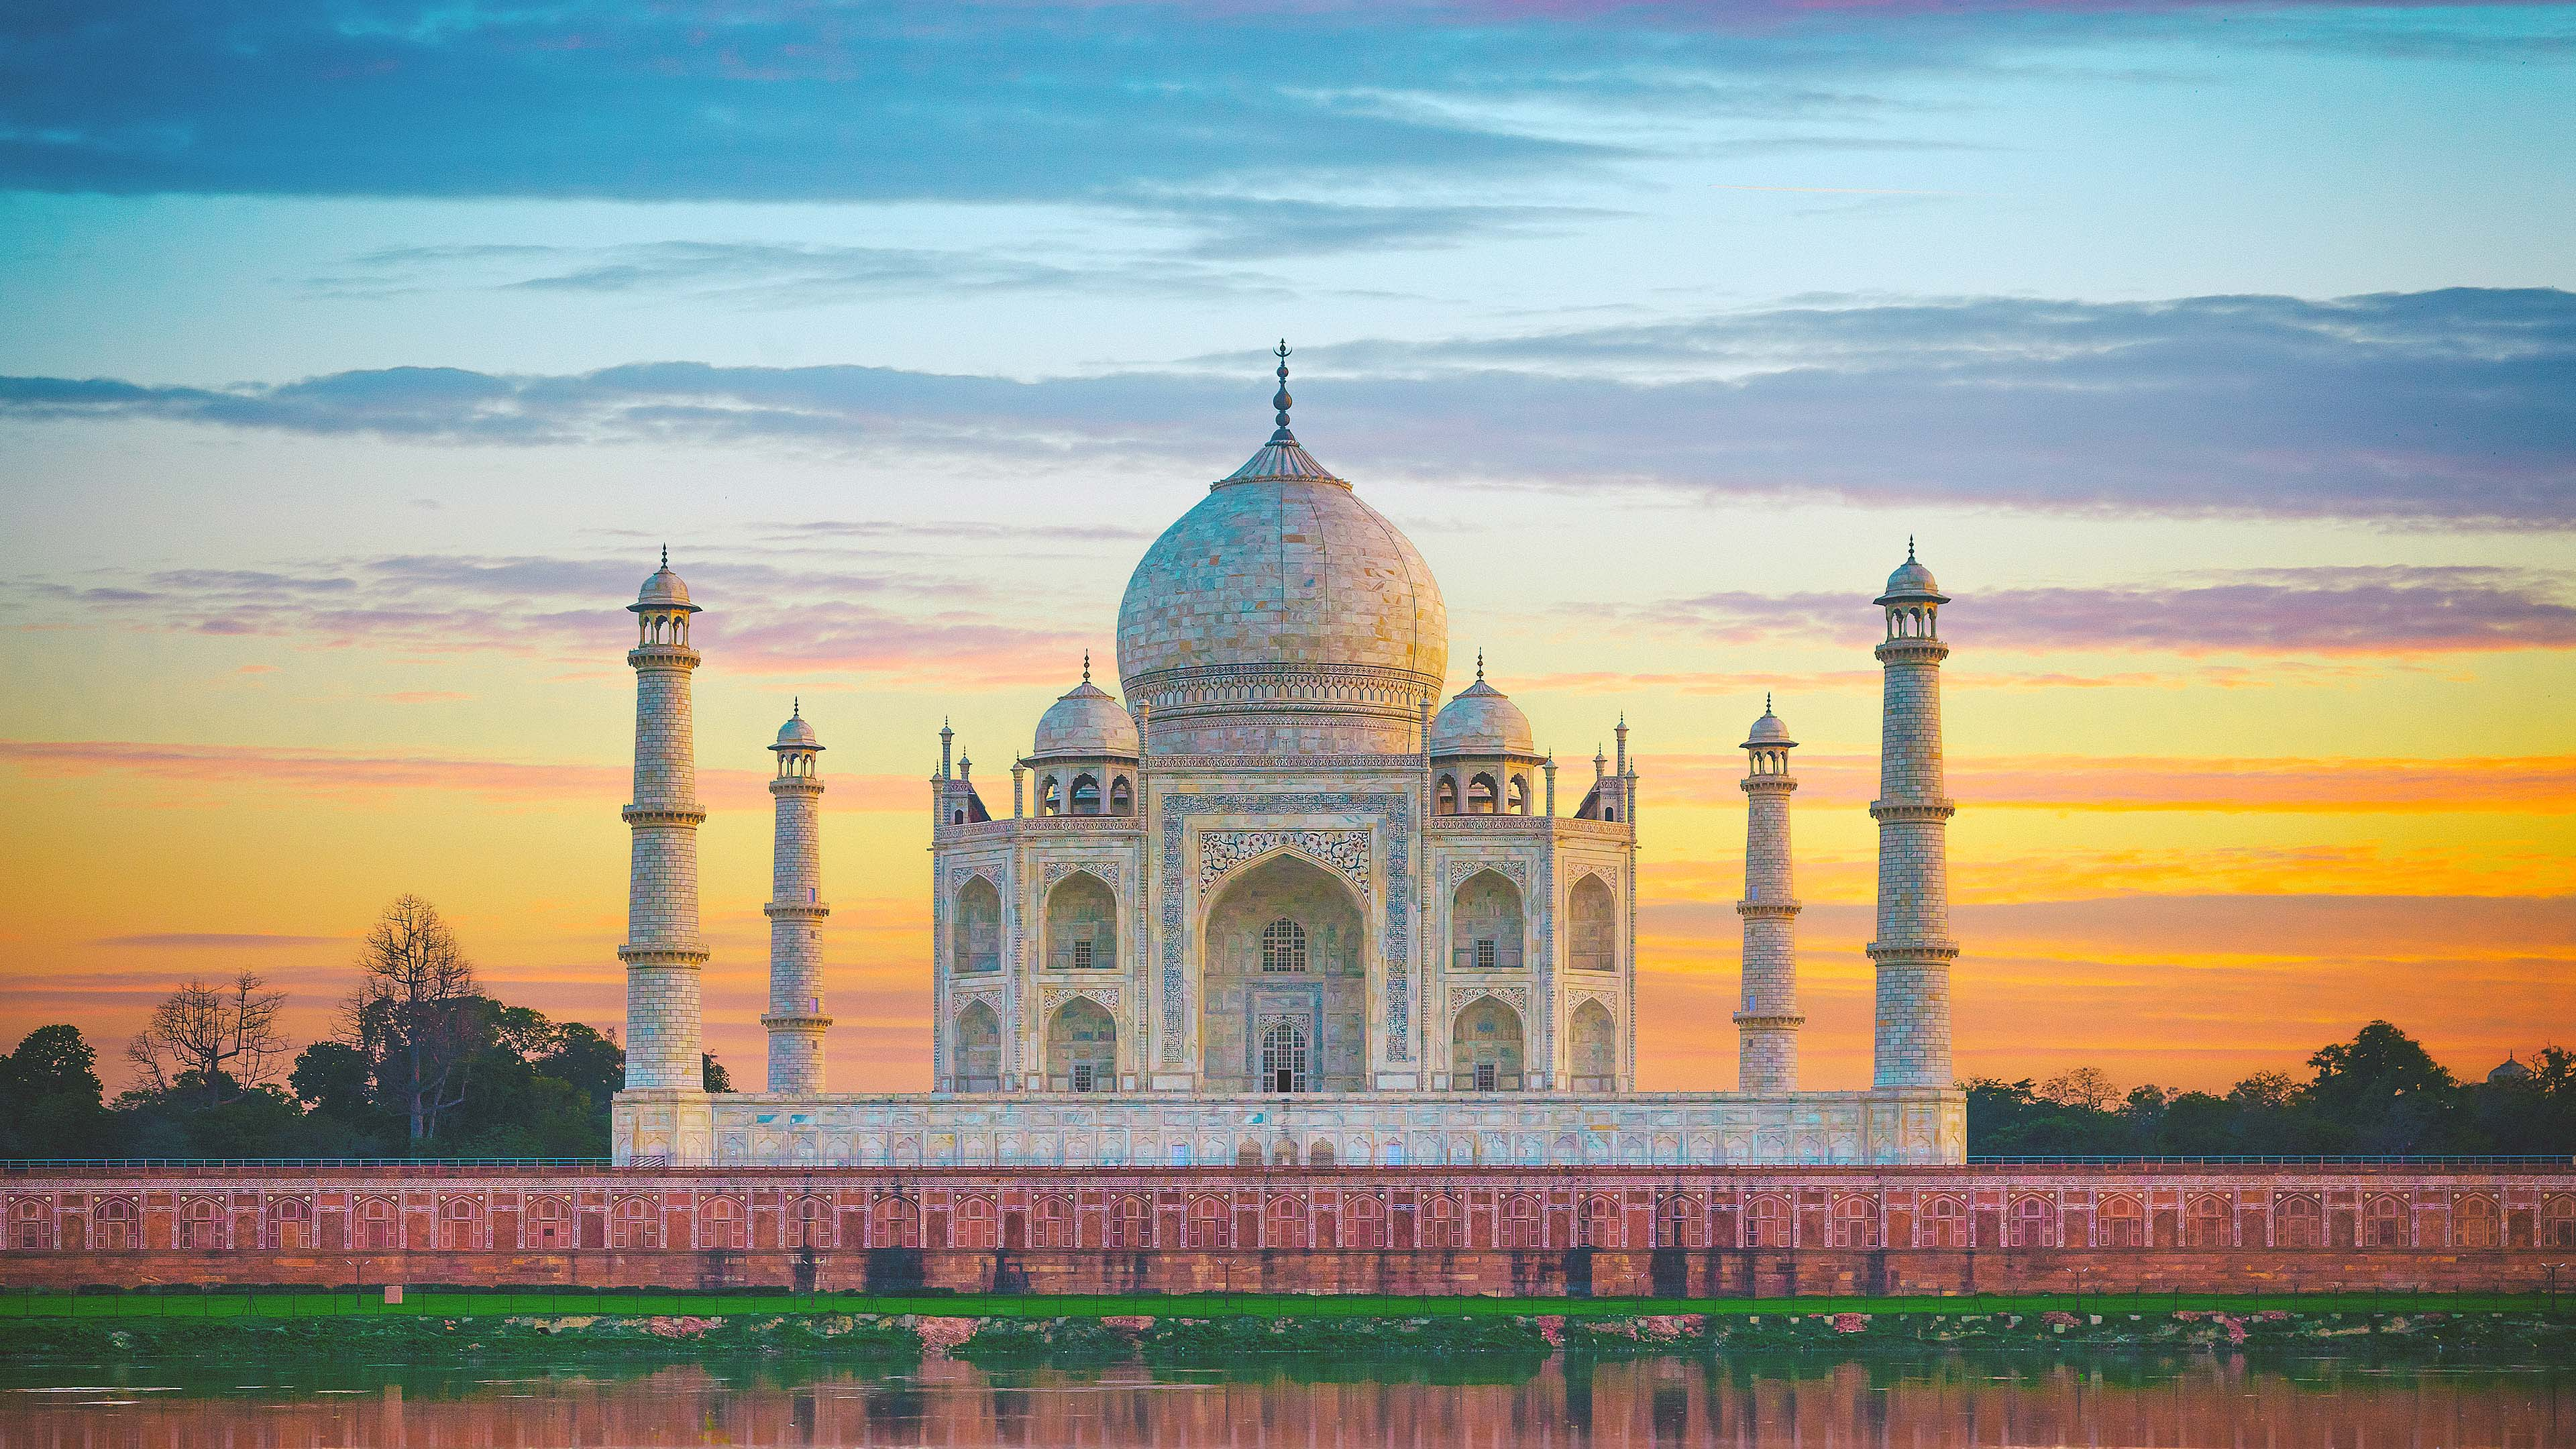

इस चित्र में ताजमहल के सामने सुंदर सूर्यास्त का दृश्य दिखाया गया है।


In [10]:
from IPython.display import Image, display
image_path = 'taj.jpg'
display(Image(image_path))
get_image_description(image_path)

In [13]:
def get_chat_completion(prompt, system_message='You are a helpful assistant', model='gpt-3.5-turbo', temperature=1, print_all=True):
    messages = [
        {'role': 'system', 'content': system_message},
        {'role': 'user', 'content': prompt}
    ]
    response = client.chat.completions.create(
        model = model,
        messages = messages,
        temperature = temperature,
        max_tokens = 50
    )
    if(print_all):
        for c in response.choices:
            print(c.message.content)

    return response



In [12]:
get_chat_completion('describe AI in 1 sentence')

AI is the simulation of human intelligence processes by machines, especially computer systems.


ChatCompletion(id='chatcmpl-AQoG0cRJu5O2wv1Z7ifG9KJAPn57w', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='AI is the simulation of human intelligence processes by machines, especially computer systems.', refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None))], created=1730953080, model='gpt-3.5-turbo-0125', object='chat.completion', service_tier=None, system_fingerprint=None, usage=CompletionUsage(completion_tokens=15, prompt_tokens=22, total_tokens=37, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=0, audio_tokens=0, reasoning_tokens=0, rejected_prediction_tokens=0), prompt_tokens_details=PromptTokensDetails(audio_tokens=0, cached_tokens=0)))

In [14]:
system_role = 'You are a experienced chef who cooks healthy food'
prompt = '''
I need to lose weight
write a weekly meal plan
I prefer Indian food
In non-veg, I eat only chicken, eggs, and mutton
'''
get_chat_completion(prompt=prompt, system_message=system_role)

Here is a sample weekly meal plan that includes healthy Indian dishes with chicken, eggs, and mutton:

Day 1:
- Breakfast: Spiced scrambled eggs with whole wheat toast
- Lunch: Grilled chicken salad with mixed greens and a light


ChatCompletion(id='chatcmpl-AQoGgUIQkTEnEoysiubj3hrOgmdIJ', choices=[Choice(finish_reason='length', index=0, logprobs=None, message=ChatCompletionMessage(content='Here is a sample weekly meal plan that includes healthy Indian dishes with chicken, eggs, and mutton:\n\nDay 1:\n- Breakfast: Spiced scrambled eggs with whole wheat toast\n- Lunch: Grilled chicken salad with mixed greens and a light', refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None))], created=1730953122, model='gpt-3.5-turbo-0125', object='chat.completion', service_tier=None, system_fingerprint=None, usage=CompletionUsage(completion_tokens=50, prompt_tokens=55, total_tokens=105, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=0, audio_tokens=0, reasoning_tokens=0, rejected_prediction_tokens=0), prompt_tokens_details=PromptTokensDetails(audio_tokens=0, cached_tokens=0)))